<a href="https://colab.research.google.com/github/Leeyounghun94/AIStudy24/blob/master/%EC%A3%BC%EC%84%B1%EB%B6%84_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

주성분 분석


In [ ]:
# 사진, 이미지 동영상 등은 대체적으로 용량이 커서 보관하기 힘들기 때문에 주성분만 분석해서 가지고 있으면 디스크용량 등에 이로움이 있다.(차원축소 알고리즘)
# 데이터가 가진 속성을 특성이라고 한다(사진에 특성 : R:빨 G:녹 B:파 K:검 A:필터)
# -> 과일 사진의 경우 10,000개의 픽셀이 있기 때문에 10,000개의 특성이 있다. -> 차원(Dimension : 디멘션)

In [1]:
# 특성이 많으면 선형 모델의 성능이 높아지고 훈련 데이터에 쉽게 과대적합이 된다.
# 차원 축소 : 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터
#   크기를 줄이고 지도학습 모델의 성능을 향상 시키기 위함

# 주성분 분석(PCA) - (Principal Component Analsis)
# : 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수도 있어야 한다.

# https://ddongwon.tistory.com/114 -> PCA (주성분 분석)

# 주성분 분석은 데이터에 있는 분산이 큰 방향으로 찾는 것으로 이해(분산 : 데이터가 널리 퍼져 있는 정도)
#   -> 데이터를 잘 표현하는 벡터?

!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-01-08 05:51:00--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-01-08 05:51:01--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-01-08 05:51:01--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [2]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

from sklearn.decomposition import PCA   # 주성분 분석 알고리즘 사용
# 사이킷런의 decomposition 모듈 아래 PCA 클래스로 활용

pca = PCA(n_components=50)  # PCA 클래스를 만들 때 주성분의 개수를 지정함 50(변경 가능)
pca.fit(fruits_2d)  # 비지도 학습임으로 타깃 제외 학습

PCA(n_components=50)

In [3]:
print(pca.components_.shape)    # components_ 주 성분이 들어 있는 속성
# 50개의 속성에 10000개(100x100 해상도)의 특성 개수

(50, 10000)


In [4]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1): # ratio = 비율, 비       => 배열의 값을 이용해서 이미지로 출력해주는 메서드.
    n = len(arr)    # n = 샘플 개수.
    # 1줄에 10개씩 이미지를 그린다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산한다.

    rows = int(np.ceil(n/10))
    # 행이 1개이면 열 개수는 샘플 개수이고 그렇지 않으면 10개.

    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n개 까지만 그린다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

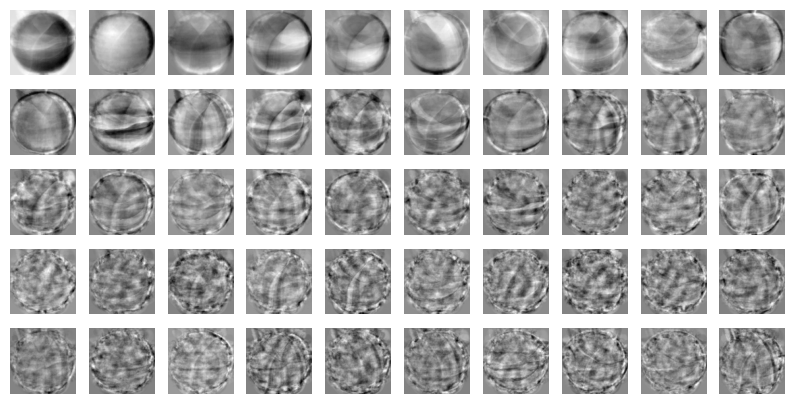

In [5]:
draw_fruits(pca.components_.reshape(-1, 100, 100)) # 10 * 5 = 50

# 주성분은 원본데이터를 투영하여 특성의 개수를 만들어낸다.
# 이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것.
# 데이터 셋에 있는 어떤 특징을 잡아낸 것처럼 생각해도 된다.

In [6]:
# 주성분을 찾았으니, 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있다.
# -> 이것을 원본의 분해 라고 한다.

# transform() 메서드를 사용하여 원본 데이터의 차원을 줄여본다.
fruits_pca = pca.transform(fruits_2d)
print(fruits_2d.shape)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


In [7]:
# 1000개의 특성을 50개로 줄였으니 어느정도 손실이 발생할 수 있다.
# 하지만, 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당 부분 재구성이 가능하다.
# 원본 데이터의 재구성 ->  inverse_transform()
fruits_inverse = pca.inverse_transform(fruits_pca)  # 원본 처럼 재구성
print(fruits_inverse.shape)     # 50개의 특성을 다시 10000개로 복원

(300, 10000)


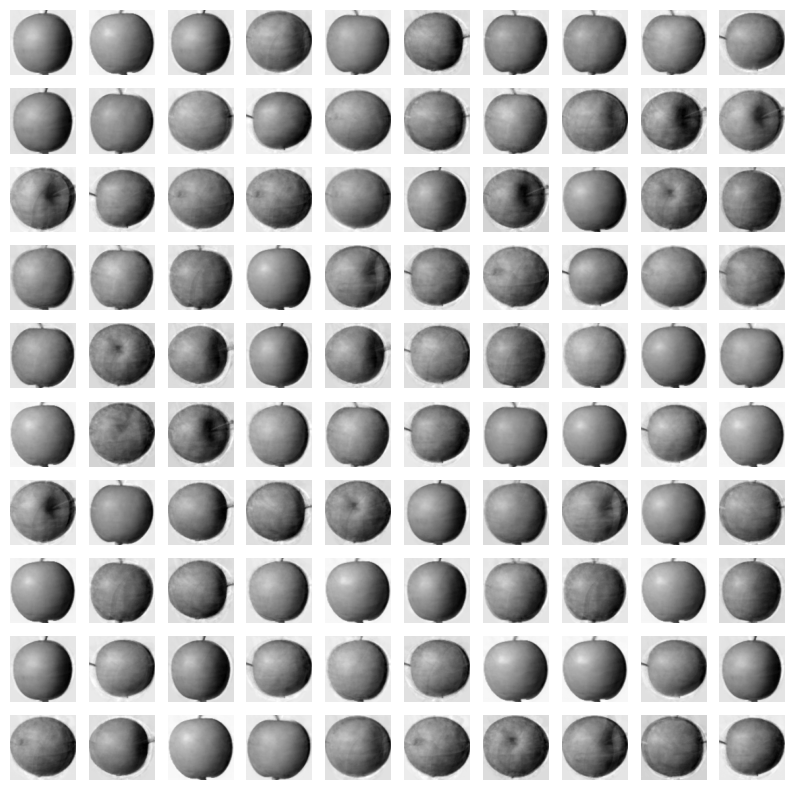

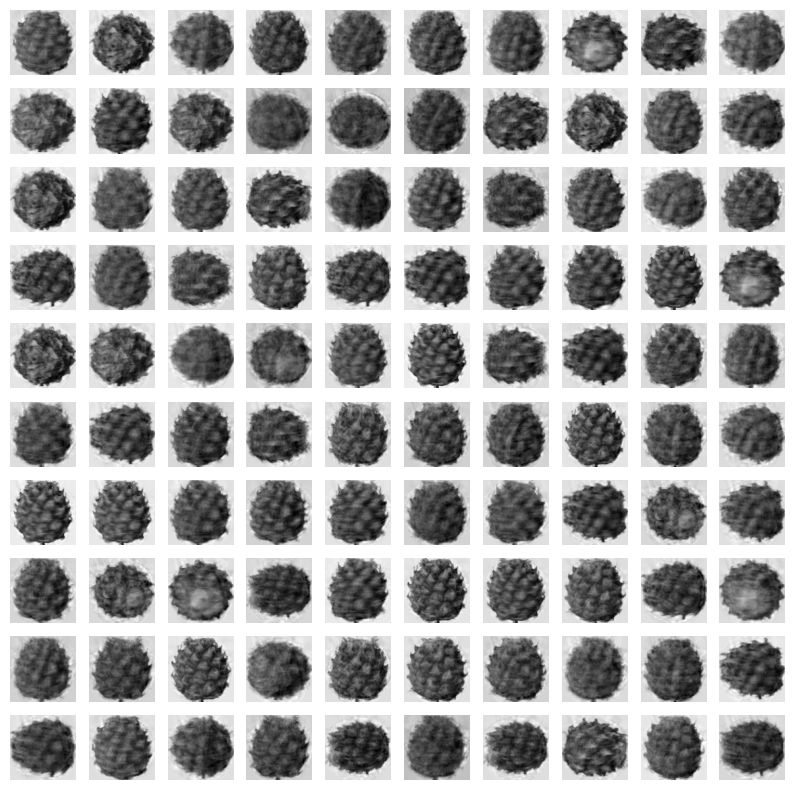

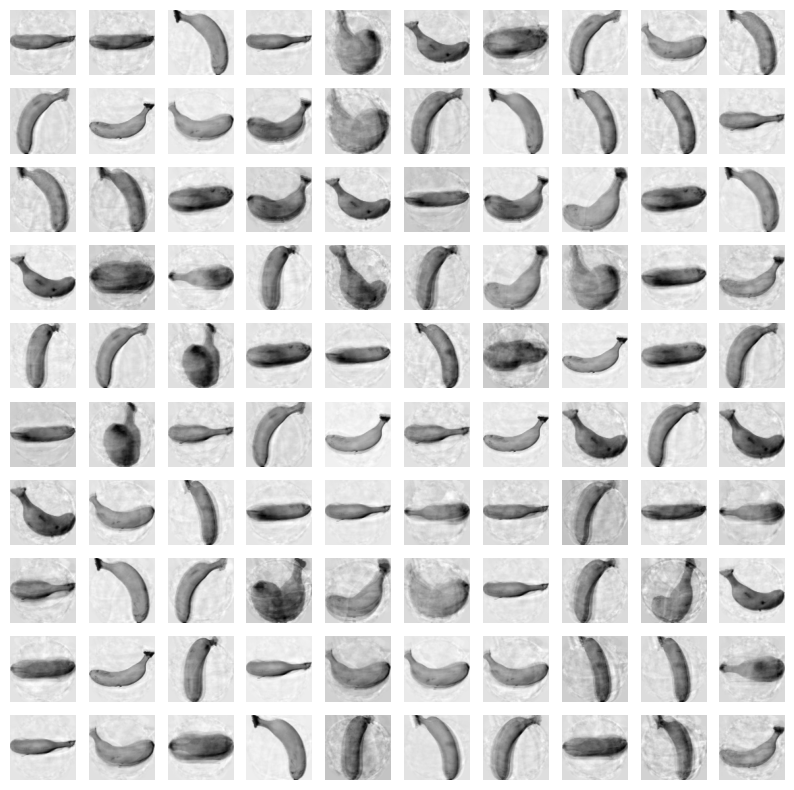

In [8]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

In [9]:
# 거의 모든 파일이 잘 복원이 된듯 하다. 특징을 잘 찾아낸 것 같으며 일부는 흐리고 번진 부분도 있지만 중요 특성은 아니다.
# 불과 50개의 특성을 10,000개로 늘린 것을 감안하면 성공적인듯 하다.

# 만약, 주성분을 최대로 사용했다면 완벽하게 원본 데이터를 재구성할 수 있을 것이다.
# 50개의 특성은 얼마나 분산을 보존하고 있을까 ? 를 알아보자.

# 설명된 분산(explained variance) : 주 성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록하는 값
# PCA 클래스의 explained_variance_ratio 에 주성분의 설명된 분산 비율이 기록되어 있음
# 첫번째 주성분의 섦여된 분산이 가장 크다.
# 이 분산 비율을 모두 더하면 50개의 주성분을 표현하고 있는 총 분산 비율
print(np.sum(pca.explained_variance_ratio_))

# 0.9215825269338708 -> 92.15% 정도가 넘는 분산을 유지하고 있다.(이미지 품질)

0.9215825269338708


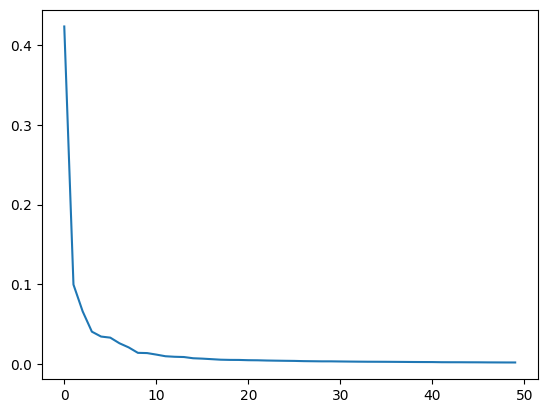

In [11]:
plt.plot(pca.explained_variance_ratio_)
plt.show()
# 그래프의 처음 10개가 주성분의 대부분을 표현하고 있다.

In [12]:
# 위에 만든 주성분으로 지도학습 모델에 적용 해보자.
# 전에 사용했던 로지스틱 회귀 모델을 사용.

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [13]:
# 지도 학습 모델을 사용하기 위해 타깃을 생성한다.
# 사과0, 파인애플1, 바나나2

target = np.array([0] * 100 + [1] * 100 + [2] * 100) # 정답 파일 생성
# 파이썬 리스트에 정수를 곱하면 리스트 안의 원소를 정수 만큼 반복한다.
# 100개의 0, 100개의 1, 100개의 2로 이루어진 타깃 데이터를 만든다.

In [14]:
from sklearn.model_selection import cross_validate  # cross_validate 크로스 검증

scores = cross_validate(lr, fruits_2d, target)  # fruits_2d 원본 데이터를 사용해 본다.
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# 0.9966666666666667 -> 99.66% 과대적합이 됨
# 특성이 10000개가 되기 때문에 300개의 샘플에서는 과대적합 모델이 된다.
# 0.8349226951599121 -> 나는 0.84초 정도 걸림.

0.9966666666666667
0.8349226951599121


In [15]:
scores = cross_validate(lr, fruits_pca, target)     # fruits_pca PCA로 축소한 자료 사용
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# 0.9966666666666667 -> 99.66% 과대 적합 -> 위와 동일
# 0.011626338958740235 -> 0.0116초로 빠르게 처리된걸 알 수 있다.

# 결론, 속도가 빠르고 용량도 적다.
# PCA로 훈련 데이터의 차원을 축소하면 저장 공간과 시간을 절약할 수 있다.

0.9966666666666667
0.011626338958740235


In [16]:
# 앞에서는 PCA클래스 사용할 때 n_components 매개 변수에 주성분 개수를 50개로 진행해봤다.

# 이 대신 비율로 줄 수도 있다. 50%

pca = PCA(n_components=0.5) # 주성분 50% (0~1 사이에 실수로 입력)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [17]:
print(pca.n_components_)

# 2개의 주성분으로 2개의 특성만으로 원본 데이터의 분산 50%를 표현할 수 있다.

2


In [18]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape) # 300개 요소에 2개의 주성분

(300, 2)


In [19]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# 0.9933333333333334 -> 99.33% 과대적합
# 0.03094139099121094 -> 0.0309초로 시간이 약간 증가

0.9933333333333334
0.03094139099121094


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [29]:
from sklearn.cluster import KMeans
# 차원 축소된 데이터를 사용하여 K-평균 알고리즘으로 클러스터를 찾아본다.
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [30]:
print(np.unique(km.labels_, return_counts=True))
# 전에 있던 값 (array([0, 1, 2], dtype=int32), array([110,  99,  91]))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


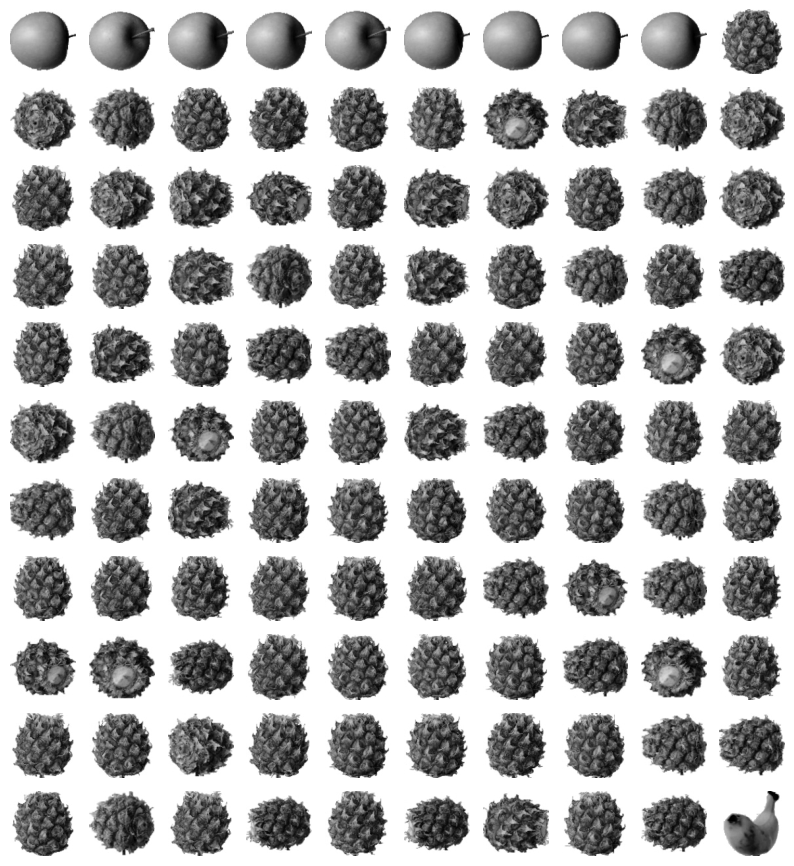

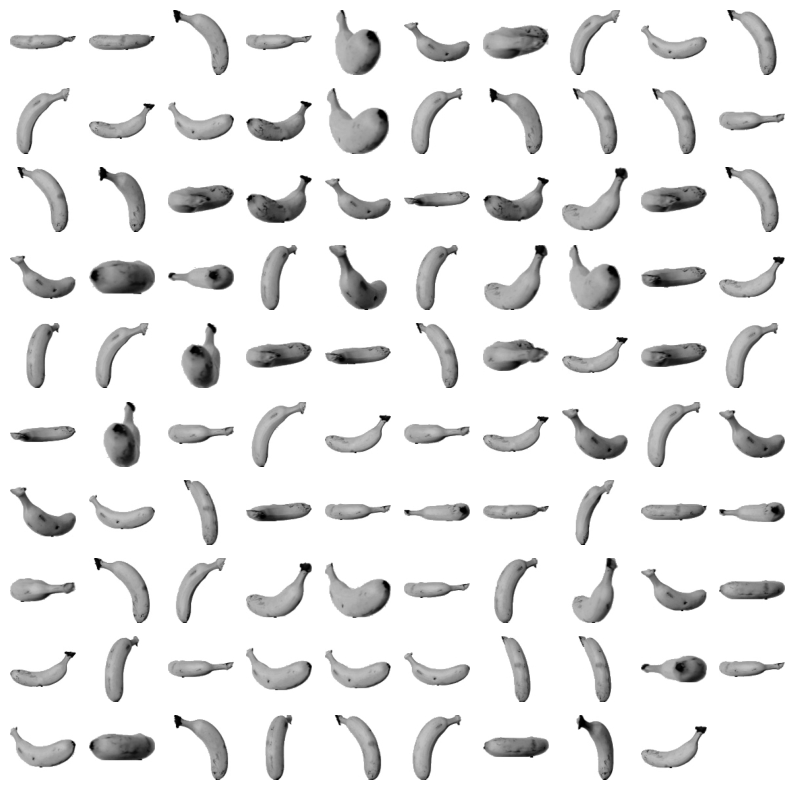

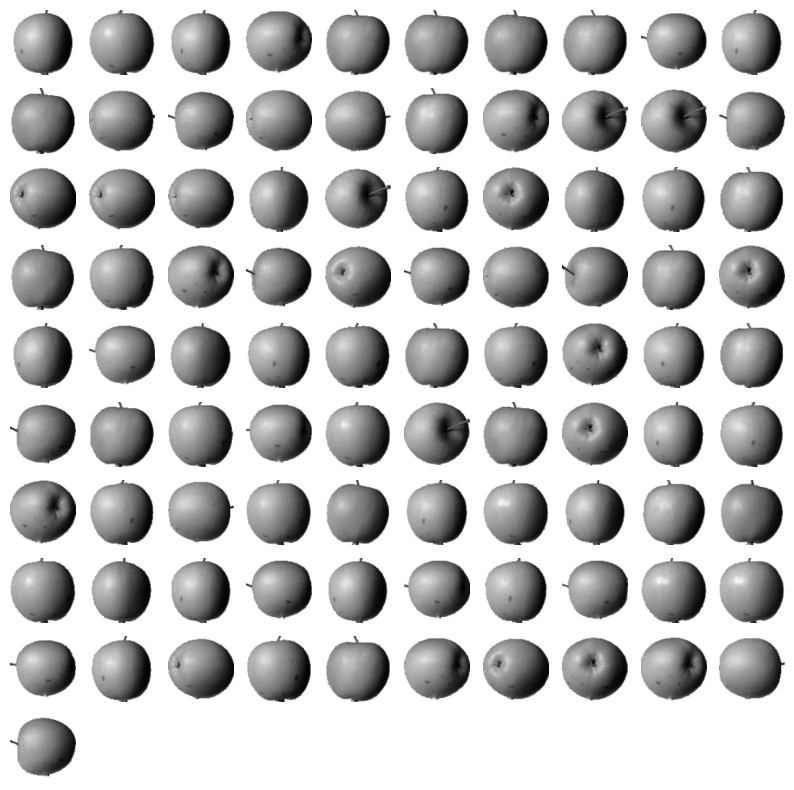

In [31]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")
# KMeans가 찾은 레이블을 사용해서 과일 이미지 출력

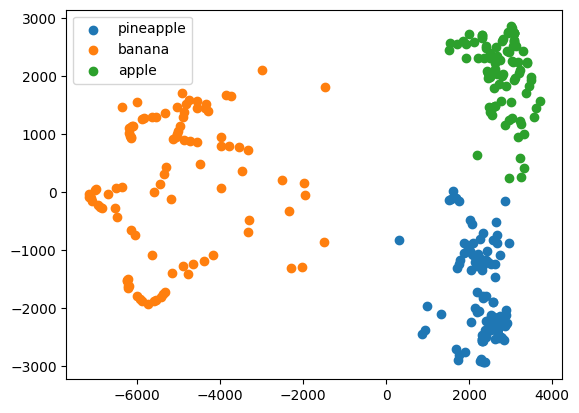

In [32]:
# 훈련 데이터의 차원을 줄이면 또 하나 얻을 수 있는 장점은 시각화가 가능하다는 점이다.
# 3개이하로 차원을 줄이면 화면에 출력하기 비교적 쉽다.
# fruits_pca 데이터가 2개의 특성으로 있기 때문에 2차원으로 표현할 수 있다.

for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
                    # km.labels_ 를 사용해서 클러스터별로 나누어 산점도를 그림
    plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple', 'banana', 'apple'])    # 범례 표시
plt.show()